In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


import scipy.interpolate as interp
#import lalsimulation as lal
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
import keras
from keras import metrics
import keras_metrics as km
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers 
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from  IPython import display
from matplotlib import pyplot as plt
import pathlib 
import shutil
import tempfile
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
#gpu configuration:

gpu_num = 1

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.config.experimental.set_visible_devices(gpus[gpu_num], 'GPU')
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")


2024-11-11 22:24:44.288424: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 22:24:44.374456: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-11 22:24:45.539206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2 Physical GPUs, 2 Logical GPUs
Visible devices cannot be modified after being initialized


2024-11-11 22:24:47.497361: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46354 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:3b:00.0, compute capability: 8.6
2024-11-11 22:24:47.499670: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46506 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:af:00.0, compute capability: 8.6


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor


In [3]:
df = pd.read_csv('polynomial3.csv')

In [4]:
df = df.iloc[:8000]
train_dataset = df.sample(frac=0.8, random_state=1)
test_dataset = df.drop(train_dataset.index)

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [6]:
train_featuress = train_features.drop(columns = ['a', 'b', 'c', 'd'], axis = 1)
test_featuress = test_features.drop(columns = ['a', 'b', 'c', 'd'], axis = 1)

In [7]:
train_labels = train_features.drop(columns = ['x1', 'y1', 'x2', 'y2'], axis = 1)
test_labels = test_features.drop(columns = ['x1', 'y1', 'x2', 'y2'], axis = 1)

In [8]:
import pandas as pd 
import numpy as np 
from tensorflow import keras 
from tensorflow.keras import layers 
from sklearn.model_selection import train_test_split

In [9]:
from tensorflow import keras
from keras import models, layers

In [74]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

input_layer = Input(shape=(train_featuress.shape[1],)) 
dense1 = Dense(units=128, activation='relu')(input_layer)
dense2 = Dense(units=128, activation='relu')(dense1)
dense3 = Dense(units=64, activation='relu')(dense2)

all_out = Dense(units=4)(dense3)

model = Model(inputs=input_layer, outputs=all_out)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, 
              loss='mse',  
              metrics=[tf.keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()])

history = model.fit(
    train_featuress, train_labels, 
    epochs=150, 
    batch_size=8, 
    validation_data=(test_featuress, test_labels), 
    verbose=1
)
#

Epoch 1/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0738 - mean_absolute_error: 0.2207 - root_mean_squared_error: 0.2705 - val_loss: 0.0574 - val_mean_absolute_error: 0.1920 - val_root_mean_squared_error: 0.2395
Epoch 2/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0579 - mean_absolute_error: 0.1943 - root_mean_squared_error: 0.2406 - val_loss: 0.0526 - val_mean_absolute_error: 0.1834 - val_root_mean_squared_error: 0.2293
Epoch 3/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0554 - mean_absolute_error: 0.1883 - root_mean_squared_error: 0.2353 - val_loss: 0.0505 - val_mean_absolute_error: 0.1787 - val_root_mean_squared_error: 0.2247
Epoch 4/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0524 - mean_absolute_error: 0.1818 - root_mean_squared_error: 0.2290 - val_loss: 0.0540 - val_mean_absolute_error: 0.1882 - val_root_mean_squared_error: 0.2324
Epoch 5/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0519 - mean_absolute_error: 0.1812 - root_mea

In [75]:
test_predictions = model.predict(train_featuress)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step


import numpy as np
import pandas as pd

stacked_predictions = np.hstack(test_predictions)
predictions_columns = ['a', 'b', 'c', 'd']
predictions = pd.DataFrame(stacked_predictions, columns=predictions_columns)


In [76]:
#predictions_array_length = len(test_predictions[:,[0]])
predictions_array_length = len(test_predictions[:,0])
numcols = 4
predictions_columns = [
    'a', 'b', 
    'c', 'd', 
]
predictions = pd.DataFrame(np.zeros((predictions_array_length, numcols)), columns=predictions_columns)
for i, col in enumerate(predictions_columns):
    predictions[col] = test_predictions[:, i]

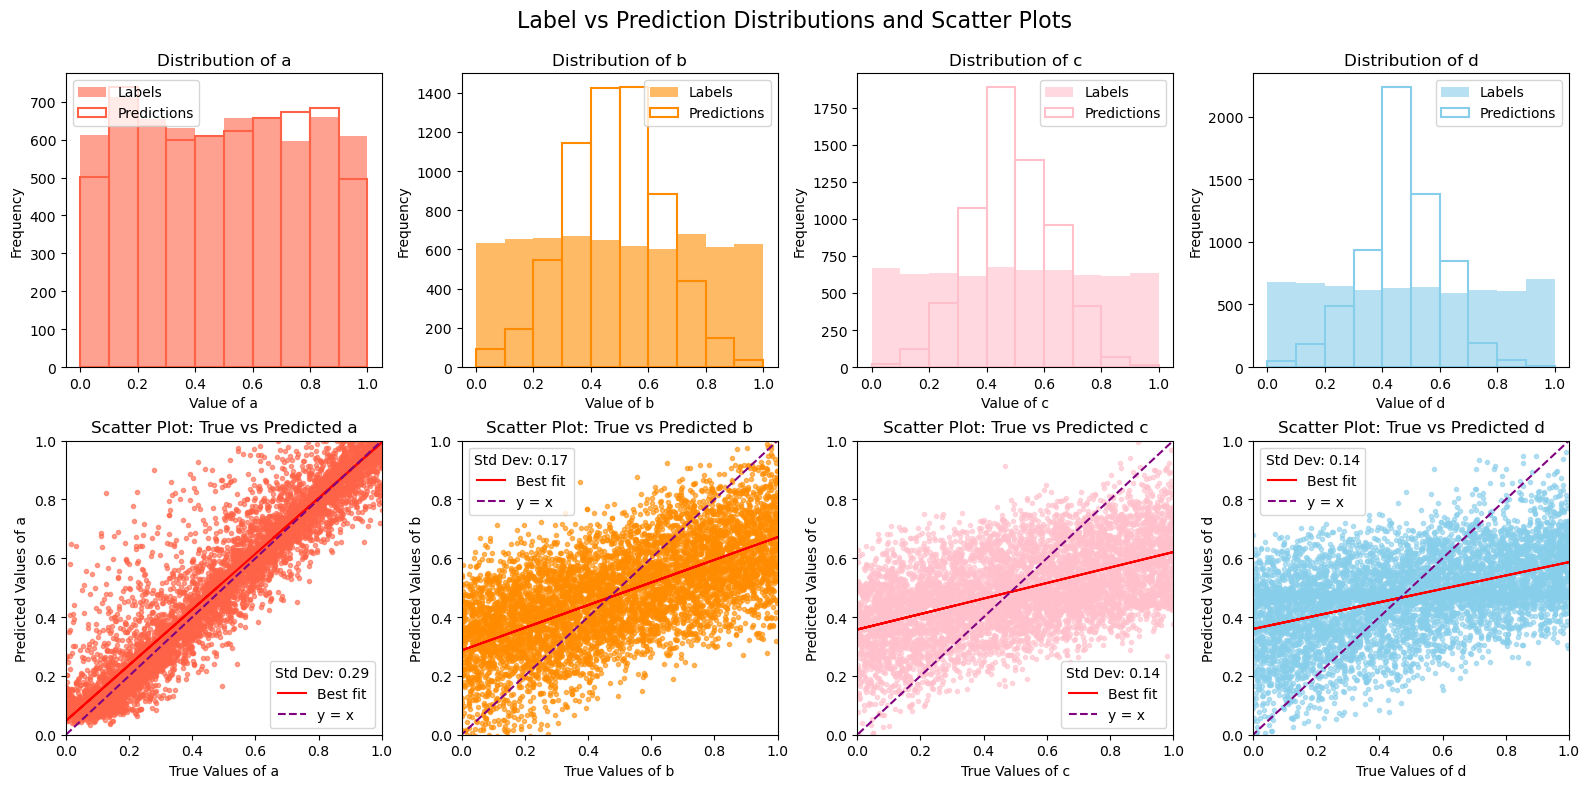

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_distributions_and_scatter(labels_df, predictions, labels_columns, colors=None, scatter_xyrange=None,dist_xrange=None):
    num_outputs = len(labels_columns)
    fig, axs = plt.subplots(2, num_outputs, figsize=(16, 8))  

    if colors is None:
        colors = ['tomato', 'darkorange', 'pink', 'skyblue', 'darkblue', 'green', 'purple', 'brown']
        
    for i, label in enumerate(labels_columns):
        color = colors[i % len(colors)]
        
        axs[0, i].hist(labels_df[label], color=color, alpha=0.6, label="Labels", range=(np.min(labels_df[label]), np.max(labels_df[label])))
        axs[0, i].hist(predictions[label], edgecolor=color, fill=False, linewidth=1.5, label="Predictions", range=(np.min(labels_df[label]), np.max(labels_df[label])))
        axs[0, i].set_title(f"Distribution of {label}")
        axs[0, i].set_xlabel(f"Value of {label}")
        axs[0, i].set_ylabel("Frequency")
        axs[0, i].legend()
        
        axs[1, i].scatter(labels_df[label], predictions[label], marker='.', color=color, alpha=0.6)
        slope, intercept = np.polyfit(labels_df[label], predictions[label], 1)
        axs[1, i].plot(labels_df[label], slope * labels_df[label] + intercept, color='red', label='Best fit')
        
        if scatter_xyrange:
            axs[1, i].set_xlim(scatter_xyrange)
            axs[1, i].set_ylim(scatter_xyrange)

        min_val = min(np.min(labels_df[label]), np.min(predictions[label]))
        max_val = max(np.max(labels_df[label]), np.max(predictions[label]))
        axs[1, i].plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='--', label='y = x')

        std_dev = np.std(predictions[label])
        axs[1, i].set_title(f"Scatter Plot: True vs Predicted {label}")
        axs[1, i].set_xlabel(f"True Values of {label}")  
        axs[1, i].set_ylabel(f"Predicted Values of {label}")
        axs[1, i].legend(title=f'Std Dev: {std_dev:.2f}')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    fig.suptitle('Label vs Prediction Distributions and Scatter Plots', fontsize=16)
    plt.show()

labels_columns = ['a', 'b', 'c', 'd'] 
labels_df = train_labels  
plot_distributions_and_scatter(labels_df, predictions, labels_columns,  scatter_xyrange=(0, 1))


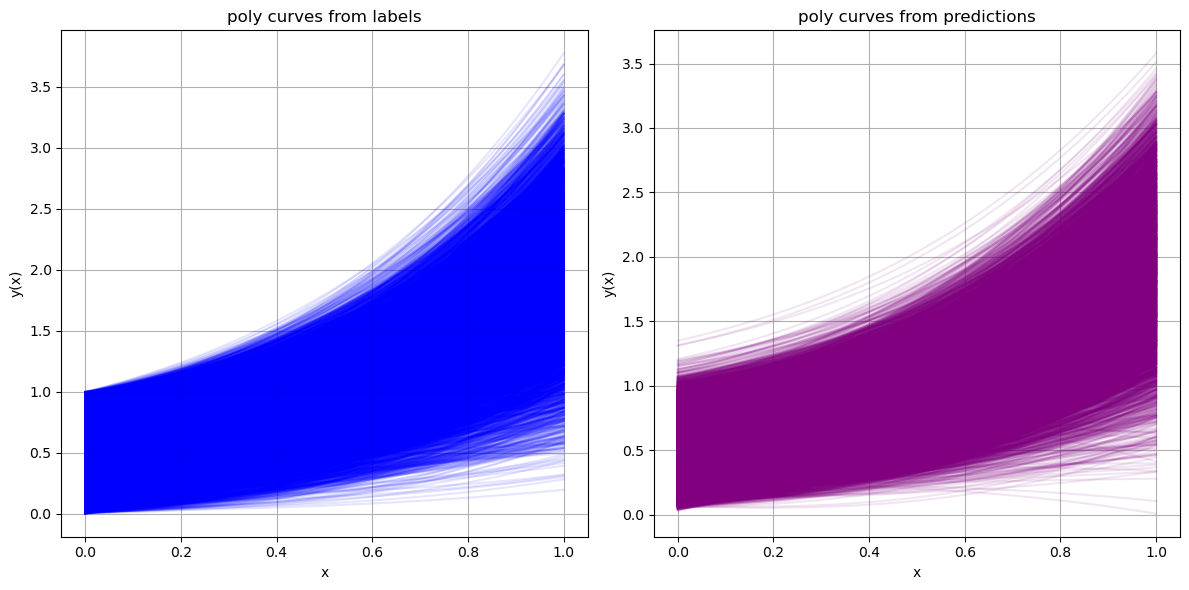

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)

max_curves = min(6400, len(predictions), len(labels_df)) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for i in range(max_curves):
    row = labels_df.iloc[i]
    a, b, c, d = row['a'], row['b'], row['c'], row['d']
    y = a + b * x + c * x**2 + d * x**3
    ax1.plot(x, y, linestyle='-', color = 'blue', alpha = 0.1)  

ax1.set_title('poly curves from labels')
ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')
ax1.grid()

for i in range(max_curves):
    row = predictions.iloc[i]
    a, b, c, d = row['a'], row['b'], row['c'], row['d']
    y = a + b * x + c * x**2 + d * x**3
    ax2.plot(x, y, linestyle='-', color = 'purple', alpha = 0.1) 

ax2.set_title('poly curves from predictions')
ax2.set_xlabel('x')
ax2.set_ylabel('y(x)')
ax2.grid()
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import pandas as pd

def rmse_over_epochs(history):
    # Convert the history to a pandas DataFrame
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    # Create the epochs array
    epochs = range(1, len(hist) + 1)
    
    # Plot RMSE for each output
    plt.figure(figsize=(12, 8))

    # Plot for a_out RMSE
    plt.plot(epochs, hist['root_mean_squared_error'], 'b-', label='Train RMSE')
    plt.plot(epochs, hist['val_root_mean_squared_error'], 'r--', label='Val RMSE')
    plt.title('RMSE vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [81]:
import matplotlib.pyplot as plt
import pandas as pd

def rmse_and_mae_over_epochs(history):
    # Convert the history to a pandas DataFrame
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    # Create the epochs array
    epochs = range(1, len(hist) + 1)
    
    # Plot RMSE and MAE for both training and validation data
    plt.figure(figsize=(12, 8))

    # Plot for RMSE
    plt.subplot(2, 1, 1)
    plt.plot(epochs, hist['root_mean_squared_error'], 'b-', label='Train RMSE')
    plt.plot(epochs, hist['val_root_mean_squared_error'], 'r--', label='Val RMSE')
    plt.title('RMSE vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()

    # Plot for MAE
    plt.subplot(2, 1, 2)
    plt.plot(epochs, hist['mean_absolute_error'], 'b-', label='Train MAE')
    plt.plot(epochs, hist['val_mean_absolute_error'], 'r--', label='Val MAE')
    plt.title('MAE vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()


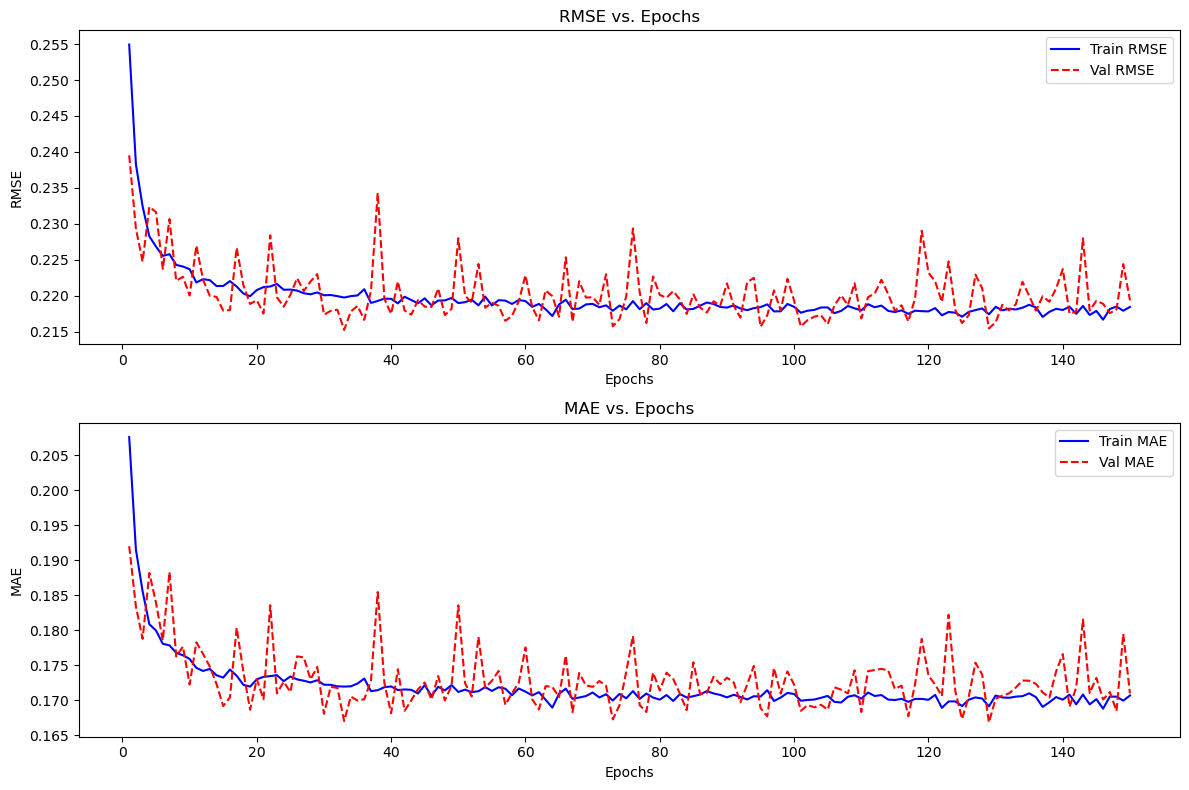

In [83]:
rmse_and_mae_over_epochs(history)